<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 3

## Q1: Lag correlations of weather time series

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
jb=hourdata[1,:]

/Users/jklymak/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


**1** From the hourly time series at Deep Cove (`dc`), calculate the *lag correlation co-efficient* $\rho_{xx}(\tau)$ out to a lag of $\tau=30\ \mathrm{days}$ (Remember this data is hourly!).  (also remember to remove the mean of $dc$ before trying to do the calculations).  

Comment on the resulting plot.

<IPython.core.display.Javascript object>


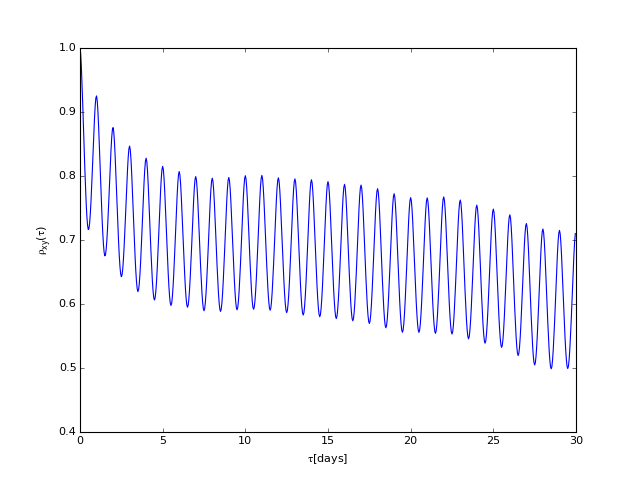

In [7]:
tau = range(0,30*24)
dc0=dc
dc=dc-np.nanmean(dc)

def getLagCorr(dc,tau):
    rho = 0.*np.array(tau)
    for ind,t in enumerate(tau):
        if t>0:
            rho[ind]=np.nanmean(dc[t:]*dc[:-t])
            rho[ind]=rho[ind]/np.nanvar(dc[t:-t])
        else:
            rho[ind]=np.nanmean(dc*dc)
            rho[ind]=rho[ind]/np.nanvar(dc)
    return rho

rho = getLagCorr(dc,tau)
            
fig,ax=plt.subplots(1,1)
ax.plot(np.array(tau)/24.,rho)
ax.set_xlabel(r'$\tau [days]$')
ax.set_ylabel(r'$\rho_{xy}(\tau)$')



There is a strong daily correlation, superimposed on a longer time scale weakening of the correlation as time gets further out.

*2* Now, instead of doing the whole year, look at just the winter months and the summer months and compare the lag correlations (no need to do this for the whole time series, just choose one winter and one summer).  Make sure to indicate which lag correlation is which on the plots.

Comment below on the different charcter of these two lag correlations.

<IPython.core.display.Javascript object>


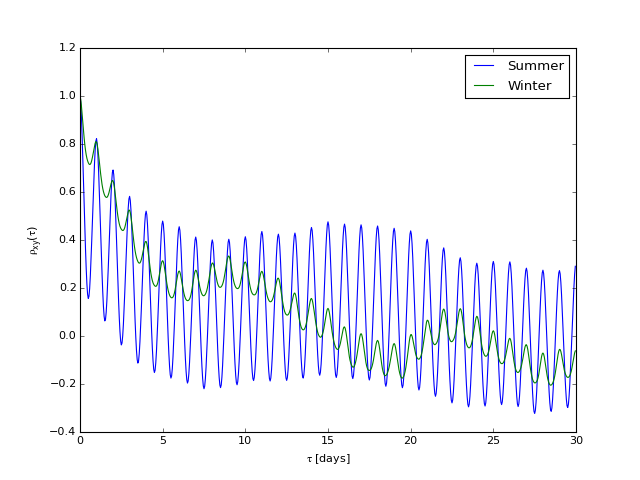

/Users/jklymak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/jklymak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [10]:
insummer = range(500*24,650*24)
tau = range(0,30*24)
dc=dc0[insummer]
dc=dc-np.nanmean(dc)

rho=getLagCorr(dc,tau)

fig,ax=plt.subplots(1,1)
ax.plot(np.array(tau)/24.,rho,label='Summer')
ax.set_xlabel(r'$\tau\ [days]$')
ax.set_ylabel(r'$\rho_{xy}(\tau)$')

inwinter = range(650*24,800*24)
tau = np.arange(0,30.*24.,1.)
dc=dc0[inwinter]
dc=dc-np.nanmean(dc)
rho=getLagCorr(dc,tau)

ax.plot(np.array(tau)/24.,rho,label='Winter')
ax.legend()

The daily correlation is much more cyclic in the summer than in the winter because the temperature variations are much greater locally in the summer.  The envelope of correlation drops more in the winter too as 14-20d is the typical cycle of weather patterns in winter, whereas summer is much more constant.  

## Q2 Emperically show that the expected value of a finite spectrum approaches the true spectrum as T goes to infinity.

**1** Consider the process $x(t) = \int_{t-b}^t y(t) \ \mathrm{dt}$ where $y(t)$ is uncorrelated white noise so that $R_{yy}(\tau)=\delta(\tau)$.  Using the definition of $R_{xx}(\tau)$, and the fact that expectation values (and integration) are linear operators, analytically show that this is a triangle function: 

\begin{equation}
    R_{xx}(\tau)=
    \begin{cases}
        b-|\tau| & |\tau|<b\\
        0 & |\tau|\geq b
    \end{cases}
\end{equation}

$R_{xx}(\tau)$ is given by:

\begin{align}
    R_{xx}(\tau)& = E\left[x(t)x(t+\tau) \right]\\
        &= E\left[ \int_{t-b}^t\int_{t+\tau-b}^{t+\tau} y(t'') y(t')\mathrm{d}t''\mathrm{d}t' \right]\\
        &=  \int_{t-b}^t\int_{t+\tau-b}^{t+\tau}E\left[ y(t'') y(t')\right]\mathrm{d}t''\mathrm{d}t' \\
        &= \int_{t-b}^t\int_{t+\tau-b}^{t+\tau} \delta(t''-t') \mathrm{d}t''\mathrm{d}t' \\
\end{align}

Integrating wrt to $t''$ first:

\begin{equation}
    R_{xx}(\tau)=\int_{t-b}^t \mathrm{d}t'
    \begin{cases}
       1 &  t+\tau-b< -t'<t+\tau\\
        0 & otherwise
    \end{cases}
\end{equation}

This has a simple integral:

\begin{equation}
    R_{xx}(\tau)=
    \begin{cases}
        b-|\tau| & |\tau|<b\\
        0 & |\tau|\geq b
    \end{cases}
\end{equation}

**2** Show emperically that you have the right *lag auto correlation* by computing the lag correlation of a random discrete timeseries $x(t)$. 

Hint: have a look at `np.convolve` to do the integration. 

Hint 2: Make sure your time series is long enough to get a nice representation of $R_{xx}(\tau)$.  Show what happens if N is too small and what happens if it gets larger. To do this well,  I used `N in [500, 5000, 50000, 5e6]`, but my machine has a good amount of memory.  Don't *test* on the bigger values, as it is slow, just add them for the final product!

<IPython.core.display.Javascript object>


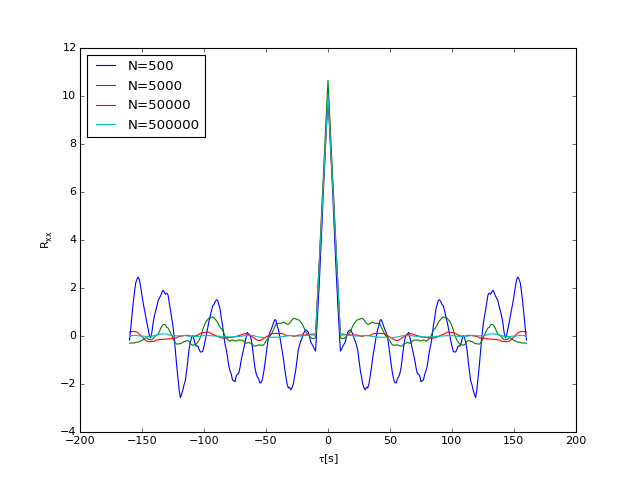

/Users/jklymak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [13]:
fig,ax=plt.subplots()
for N in [500,5000,50000,500000]:
    b=10
    y = np.random.randn(N)
    x = np.convolve(y,np.ones(b),mode='valid')
    #x=x-np.mean(x)
    taus = np.arange(-b-150,b+150.1,1.)
    R=0.*taus
    for ind,tau in enumerate(taus):
        if np.abs(tau)>0:
            if tau<0:
                tau=-tau
            R[ind]=np.mean(x[np.floor(tau):]*x[:-np.floor(tau)])
        else:
            R[ind]=np.mean(x*x)
    ax.plot(taus,R,label='N=%d'%N)
ax.set_xlabel(r'$\tau [s]$')
ax.set_ylabel(r'$R_{xx}$')
ax.legend(loc=2)

**3** Derive (or look up) $S_{xx}(f)$ of this process:

The Fourier transform of a triangle function is the Fourier transform of a square wave or heavyside function $H(\tau)$ convolved with itself:

\begin{align}
    S_{xx}(f) &= \mathbb{F} \left[ R_{xx}(\tau) \right]\\
              &= \mathbb{F} \left[ H(\tau)\star H(\tau) \right]\\
              &= \mathbb{F} \left[ H(\tau)\right] \mathbb{F} \left[ H(\tau)\right]\\
              &= b^2\mathrm{sinc}^2\left(f b\right)
\end{align}

**4** Demonstrate with finite values of $T$ that $\lim_{T->\infty}S_{xx}(f,T) = S_{xx}(f)$ does *not* converge to $S_{xx}(f)$.  Do this by taking longer values of $T$, fitting to the same set of $f$, and graphically showing that the spectral estimate does not improve.  (Do **not** use canned `fft` routines, unless you prove they work first.)

Hints: 
  - When you choose your discrete values of $f$, make sure you don't choose them to be too high (i.e. if you define $\Delta t=1 \ \mathrm{s}$ in your time series above, then there is no need to have frequencies greater than 1 Hz; actually no need to have them greater than 0.5 Hz, as we will see in the next lecture.
  - I would recommend writing a small funtion to do the integration for the Fourier Transform so that you are not rewriting the same code.  To do this, you would do something like:

```python
def dft(x,dt,f): 
    # where x is your time series, dt is the sample rate in seconds, 
    # and f are the frequencies in Hz you want the Fourier Series calculated on
    
    # Your code in here
    return X # where X is your Fourier tranform
```

  - Choose the length of your spectra to go up by decades (i.e. 500,5000,...)
  - use `ax.loglog(f,X)` to make your plots.  We almost always plot spectra using `loglog`.



<IPython.core.display.Javascript object>


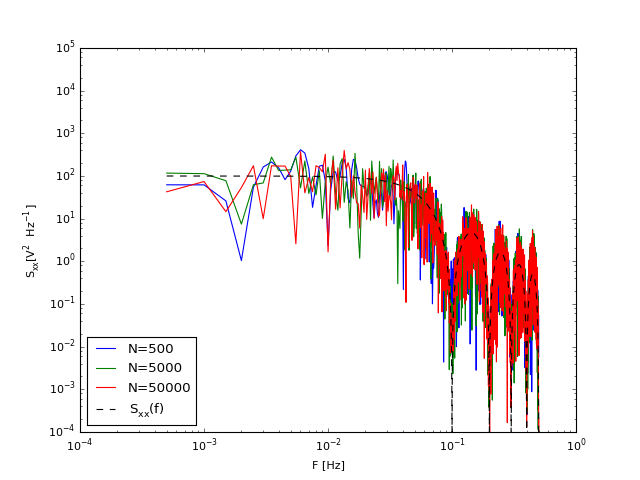

In [23]:
# first lets make our own Fourier transform.

def dft(x,dt,f):
    t = dt*np.arange(0,len(x))
    T,F=np.meshgrid(t,f)
    # make the fourier matrices
    E = np.exp(-1j*2*np.pi*T*F)
    X = dt*np.dot(E,x)
    return X

fit,ax=plt.subplots(1,1)
f = np.linspace(0,0.5,1000.)
for N in [500,5000,50000]:
    X = dft(x[:N],1.,f)
    ax.loglog(f,np.real(np.conj(X)*X)/N,label='N=%d'%N)
ax.loglog(f,(b*np.sinc(f*b))**2,'k--',label=r'$S_{xx}(f)$')
ax.set_ylim([1e-4,1e5]);ax.set_xlabel('F [Hz]');ax.set_ylabel(r'$S_{xx} [V^2\,Hz^{-1}]$')
ax.legend(loc=3)

The spectral estimate does *not* improve with more data.

**5** Now demonstrate that the *expected value* of 

$$E\left[\lim_{T->\infty}S_{xx}(f,T)\right]$$ 

approaches $S_{xx}(f)$ by *averaging* a number of your moderate lengthed spectral estimates together.  Comment on the form of the spectrum relative to how you made the timeseries.

Hints:
  
  - Just do what you did above, but average the results of `navg` non-overlapping segments of data.  
  - This gets computationally expensive, I did `navg` of `1, 5, 50, 100` and got nice results.  Test your code on just `navg` of `1` and `5`, and when its working add the higher numbers.

<IPython.core.display.Javascript object>


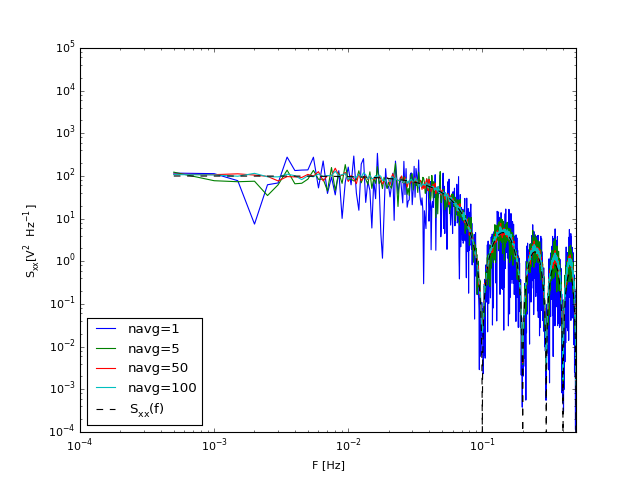

In [22]:
N = 5000
nn= len(x)/N
nn=50
fig,ax=plt.subplots(1,1)
#for nn in [1,5,50,100]:
    Sxx=0.
    for ii in range(nn):
        X = dft(x[N*(ii):N*(ii+1)],1.,f)
        Sxx = Sxx+np.real(np.conj(X)*X)/N
    Sxx=Sxx/nn
    ax.loglog(f,Sxx,label='navg=%d'%nn)
ax.loglog(f,(b*np.sinc(f*b))**2,'k--',label=r'$S_{xx}(f)$')
ax.set_ylim([1e-4,1e5]);
ax.set_xlim([1e-4,5e-1]);
ax.legend(loc=3)
ax.set_xlabel('F [Hz]');ax.set_ylabel(r'$S_{xx} [V^2\,Hz^{-1}]$')

As we average more spectra the spectra get smoother, as expected.